In [ ]:
import importlib
import mls_mechanics as mls

In [6]:
import os
import pandas as pd
import numpy as np

def compute_influence_scores(tr_data, vl_data):
    tr_df = pd.concat(tr_data, ignore_index=True)
    vl_df = pd.concat(vl_data, ignore_index=True)
    
    influence_scores = {}
    unique_indices = tr_df['idx'].unique()
    
    for idx in unique_indices:
        vl_with_idx = vl_df[vl_df['idx'].isin(tr_df[tr_df['idx'] == idx]['idx'])]['f1'].mean()
        vl_without_idx = vl_df[~vl_df['idx'].isin(tr_df[tr_df['idx'] == idx]['idx'])]['f1'].mean()
        influence_scores[idx] = vl_with_idx - vl_without_idx
    
    return pd.DataFrame(list(influence_scores.items()), columns=['idx', 'Influence_Score'])

# Load data
tr_data = []
vl_data = []
data_path = '/Users/ilanastern/Desktop/aiConfidential/data'

for root, dirs, files in os.walk(data_path):
    if root.endswith('_TR.eval') or root.endswith('_VL.eval') and '_upsample_rand50' not in root:
        for file in files:
            if file.startswith('eval_loss_meta'):
                file_path = os.path.join(root, file)
                try:
                    df = pd.read_csv(file_path)
                    if root.endswith('_TR.eval'):
                        tr_data.append(df)
                    elif root.endswith('_VL.eval'):
                        vl_data.append(df)
                except:
                    print(f'Error reading {file_path}')

# Compute influence scores
influence_scores_df = compute_influence_scores(tr_data, vl_data)
print(influence_scores_df)



        idx  Influence_Score
0     27227        -0.020315
1     28086         0.174814
2     12877        -0.163278
3     20718         0.137840
4     12765         0.135637
...     ...              ...
2838  26323        -0.207246
2839  27610         0.174210
2840  34450         0.159754
2841  29247         0.145615
2842  36737        -0.264116

[2843 rows x 2 columns]


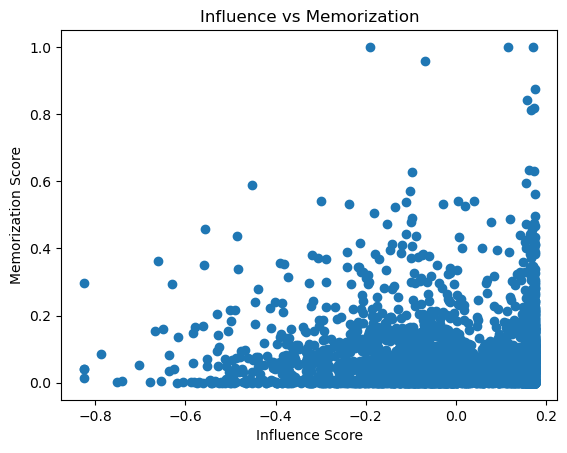

In [14]:
import matplotlib.pyplot as plt
memorization = fd.memscore_df_upsample

plt.plot(influence_scores_df['Influence_Score'], memorization['Memorization_Score'], 'o')
plt.xlabel('Influence Score')
plt.ylabel('Memorization Score')
plt.title('Influence vs Memorization')
plt.show()
